# Bangladesh Refugee Choropleth Matplotlib Map

In [6]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 57.6 MB/s eta 0:00:00


In [29]:
import xlrd
import random
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import contextily as ctx
import requests
from io import BytesIO
import json

## Data Importation

In [11]:
## Shapefile Data
fp = "/content/drive/My Drive/Colab/Bangladesh_pop/master_list.shp"
map_df = gpd.read_file(fp)
map_df


,SSID,BlockID,Site Name,Other Site,Block Name,Note,Status,Priority,Latitude,Longitude,...,Type,Division,District,Upazila,Union,Last Round,Last Updat,Households,Individual,geometry
0,CXB-004,CXB-004-01,Burma Para,Tasnimarkhola,Burma Para,None,Active,High,21.175719,92.142577,...,New Spontaneous Site,Chittagong,Cox's_Bazar,Ukhia,Palong_Khali,6.0,2017-10-01,"5,369","27,594",POINT (92.14258 21.17572)
1,CXB-012,CXB-012-01,Jamtoli,Thangkhali,Jamtoli,None,Active,High,21.159275,92.147026,...,New Spontaneous Site,Chittagong,Cox's_Bazar,Ukhia,Palong_Khali,6.0,2017-10-01,"5,274","30,375",POINT (92.14703 21.15927)
2,CXB-014,CXB-014-01,Jumpara,None,Jumpara,None,Active,Normal,21.068603,92.143758,...,Host Communities,Chittagong,Cox's_Bazar,Teknaf,Baharchhara,6.0,2017-10-03,73,400,POINT (92.14376 21.0686)
3,CXB-017,CXB-017-03,Leda,None,Nuralipara,None,Active,Normal,20.963984,92.245284,...,Host Communities,Chittagong,Cox's_Bazar,Teknaf,Nhilla,6.0,2017-10-02,"2,054","10,270",POINT (92.24528 20.96398)
4,CXB-017,CXB-017-02,Leda,None,Moulovipara,None,Active,Normal,20.973953,92.245213,...,Host Communities,Chittagong,Cox's_Bazar,Teknaf,Nhilla,6.0,2017-10-02,"1,200","5,945",POINT (92.24521 20.97395)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,CXB-131,CXB-131-01,Zone WW,None,Zone WW,None,Inactive,Normal,21.194572,92.145171,...,Additional Expansion,Chittagong,Cox's_Bazar,Ukhia,Palong_Khali,NaN,None,-,-,POINT (92.14517 21.19457)
80,CXB-132,CXB-132-01,Zone XX,None,Zone XX,None,Inactive,Normal,21.187816,92.146525,...,Additional Expansion,Chittagong,Cox's_Bazar,Ukhia,Palong_Khali,NaN,None,-,-,POINT (92.14652 21.18782)
81,CXB-133,CXB-133-01,Zone YY,None,Zone YY,None,Active,High,21.182003,92.146268,...,New Spontaneous Site,Chittagong,Cox's_Bazar,Ukhia,Palong_Khali,6.0,2017-10-07,700,"3,500",POINT (92.14627 21.182)
82,CXB-134,CXB-134-01,Zone ZZ,None,Zone ZZ,None,Inactive,Normal,21.191114,92.140468,...,Additional Expansion,Chittagong,Cox's_Bazar,Ukhia,Palong_Khali,NaN,None,-,-,POINT (92.14047 21.19111)


In [12]:
map_df.columns

Index(['SSID', 'BlockID', 'Site Name', 'Other Site', 'Block Name', 'Note',
       'Status', 'Priority', 'Latitude', 'Longitude', 'Class', 'Type',
       'Division', 'District', 'Upazila', 'Union', 'Last Round', 'Last Updat',
       'Households', 'Individual', 'geometry'],
      dtype='object')

<class 'geopandas.geodataframe.GeoDataFrame'>


<Axes: >

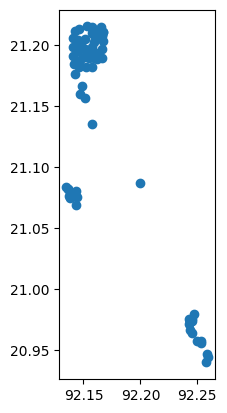

In [25]:
locations_sites = map_df['Site Name'].tolist()
print(type(map_df))
# Plotting default map
map_df.plot()

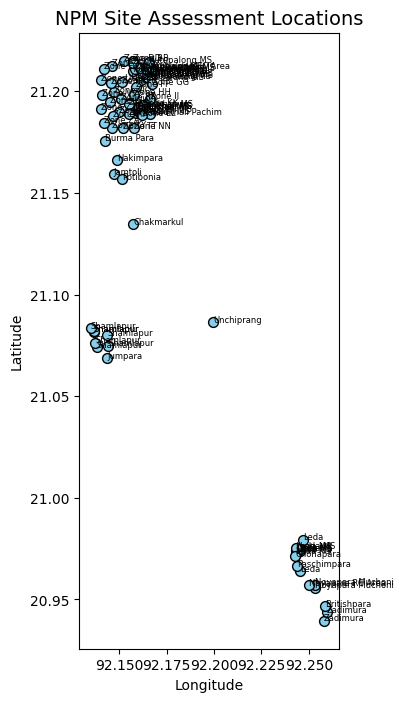

In [40]:
gdf = gpd.GeoDataFrame(map_df, geometry='geometry', crs="EPSG:4326")

# Plotting base map
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color="skyblue", edgecolor="black", markersize=50)

# Adding Labels
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf["Site Name"]):
    ax.text(x, y, label, fontsize=6)

# Titles & axes
ax.set_title("NPM Site Assessment Locations", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

In [43]:
gdf_web = gdf.to_crs(epsg=3857)

In [10]:
## Data File for Summary Analysis
file_path = "/content/drive/My Drive/Colab/Bangladesh_pop/npm-r6-site-assessment-dataset-2017-october-xlsx-2.xlsx"
df = pd.read_excel(
    file_path,
    sheet_name=1,       # "Summary Analysis"
    skiprows=11,        # skip first 11 rows
    usecols="A:D"       # only columns A-D
)

## Data Overview
print(df.head())

       Location name  Total Households  Total individuals  Family size Avg.
0       Balukhali MS              9099              44289          4.867458
1  Balukhali Pachim                 35                175          5.000000
2        Britishpara               177                885          5.000000
3         Burma Para              5369              27594          5.139505
4         Chakmarkul              2000              10500          5.250000


## Merging Datasets

In [44]:
merged = gdf_web.set_index('Site Name').join(df.set_index('Location name'))
print(merged)

               SSID     BlockID     Other Site   Block Name  Note    Status  \
Site Name                                                                     
Burma Para  CXB-004  CXB-004-01  Tasnimarkhola   Burma Para  None    Active   
Jamtoli     CXB-012  CXB-012-01     Thangkhali      Jamtoli  None    Active   
Jumpara     CXB-014  CXB-014-01           None      Jumpara  None    Active   
Leda        CXB-017  CXB-017-03           None   Nuralipara  None    Active   
Leda        CXB-017  CXB-017-02           None  Moulovipara  None    Active   
...             ...         ...            ...          ...   ...       ...   
Zone WW     CXB-131  CXB-131-01           None      Zone WW  None  Inactive   
Zone XX     CXB-132  CXB-132-01           None      Zone XX  None  Inactive   
Zone YY     CXB-133  CXB-133-01           None      Zone YY  None    Active   
Zone ZZ     CXB-134  CXB-134-01           None      Zone ZZ  None  Inactive   
Zone ZA     CXB-135  CXB-135-01           None      

## Plots

### Map 1

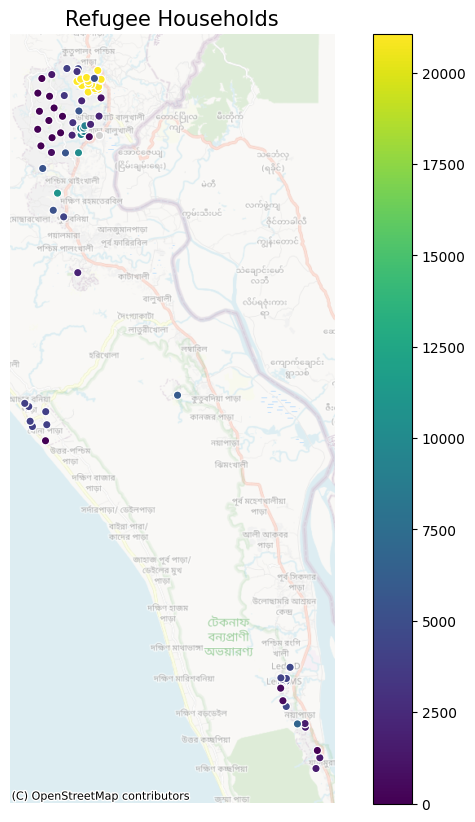

In [55]:
merged = merged.to_crs(epsg=3857)

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("Refugee Households", fontdict={"fontsize": 15, "fontweight": "3"})

# Plot
merged.plot(
    column="Total Households",
    cmap="viridis",
    linewidth=0.9,
    ax=ax,
    edgecolor="1",
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values",
    },
)

# Basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.4)

plt.show()

### Map 2

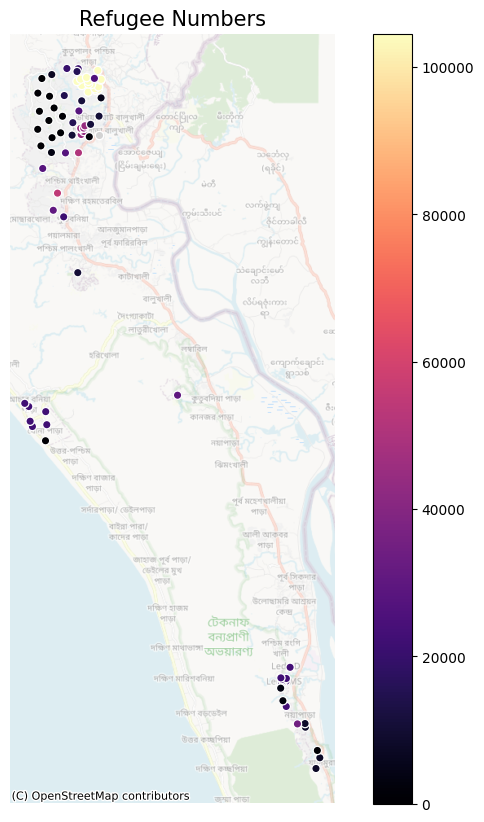

In [58]:
merged = merged.to_crs(epsg=3857)

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("Refugee Numbers", fontdict={"fontsize": 15, "fontweight": "3"})

# Plot
merged.plot(
    column="Total individuals",
    cmap="magma",
    linewidth=0.9,
    ax=ax,
    edgecolor="1",
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values",
    },
)

# Basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.4)

plt.show()

### Map 3

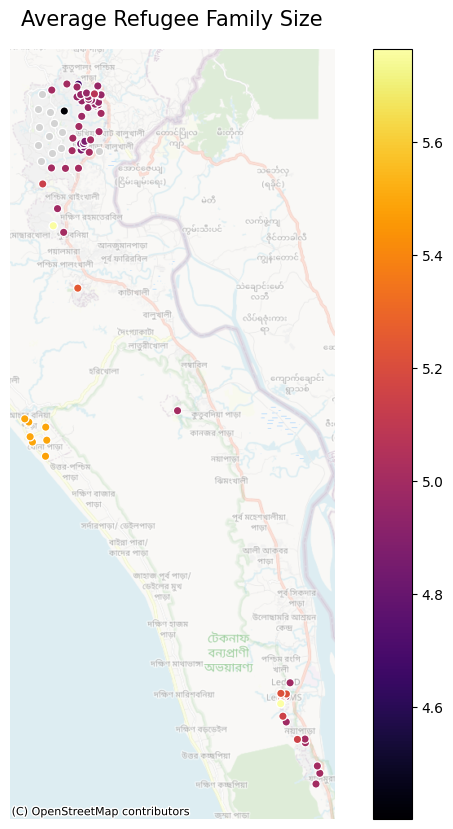

In [60]:
merged = merged.to_crs(epsg=3857)

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis("off")
ax.set_title("Average Refugee Family Size", fontdict={"fontsize": 15, "fontweight": "3"})

# Plot
merged.plot(
    column="Family size Avg.",
    cmap="inferno",
    linewidth=0.9,
    ax=ax,
    edgecolor="1",
    legend=True,
    missing_kwds={
        "color": "lightgrey",
        "label": "Missing values",
    },
)

# Basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.4)

plt.show()